In [294]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms
import os
import sys
os.chdir('../')
sys.path.append('./')
os.getcwd()
from utils.misc_utils import get_psnr, image_normalization
from models.djsccn import DJSCCN_CIFAR
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
from tensorboard.backend.event_processing import event_accumulator, event_multiplexer
import pandas as pd

### For SNR

In [295]:
log_dir = 'C:\SemCom\SemCom_new\SemCom-Pytorch\out\eval'
ea = event_multiplexer.EventMultiplexer().AddRunsFromDirectory(log_dir)
os.getcwd()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\wine\AppData\Local\Temp\ipykernel_26648\1623824597.py:1: SyntaxWarning: invalid escape sequence '\S'
  log_dir = 'C:\SemCom\SemCom_new\SemCom-Pytorch\out\eval'


'c:\\'

In [296]:
dataset_name = 'cifar10'
ratio ='1 / 12'
ratio_float = str(eval(ratio))
channel = 'AWGN'

for run in sorted(ea.Runs().keys(), key=lambda x: float(x.split('_')[1])):
        if (dataset_name or dataset_name.upper() in run.split('_')) and (ratio_float in run.split('_')) and (channel in run.split('_') or channel.upper() in run.split('_')):
            snr = int(float((run.split('_')[1])))
            print(snr)
print("hihi " + str(len(ea.Runs())))

hihi 13


In [297]:
def plot_snr(dataset_name, ratio, ea, channel, alpha = 1):
        
    ratio_float = str(eval(ratio))
    log_dir = 'C:\SemCom\SemCom_new\SemCom-Pytorch\out\eval/'
    tag = 'psnr'
    ea = event_multiplexer.EventMultiplexer().AddRunsFromDirectory(log_dir)
    ea.Reload()
    markers = ['o', 's', 'D', '|', '*', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    index = 0
    plt.figure(figsize=(7.5,6))
    for run in sorted(ea.Runs().keys(), key=lambda x: float(x.split('_')[1])):
        if (dataset_name or dataset_name.upper() in run.split('_')) and (ratio_float in run.split('_')) and (channel in run.split('_') or channel.upper() in run.split('_')):
            snr = int(float((run.split('_')[1])))
            print(snr)
            # lấy dữ liệu PSNR trong Tensorboard
            sc = ea.Scalars(run, tag)
            df = pd.Series(data=[s.value for s in sc], index=[s.step for s in sc])
            smooth = df.ewm(alpha = alpha).mean()
            parts = run.split('_')
            plt.plot([s for s in smooth.index], [s for s in smooth.values], label=rf"{parts[3].upper()} ($\mathrm{{SNR}}_{{\mathrm{{train}}}}$) = {snr} dB",linewidth=1.8,
                                marker = markers[index], markerfacecolor = 'None', markersize = 10 if markers[index]=='|' else 6, markeredgewidth = 2.1, markevery = 4)
                
            # plt.plot([s for s in smooth.index][::15], [s for s in smooth.values][::15], linestyle = 'None',
            #         marker = markers[index], color = line[0].get_color(), markerfacecolor = 'None', markersize=8, markeredgewidth = 1.5)
            index += 1
            
            
            
    plt.legend(prop={'size': 13})
        

    # plt.xlabel(r"$\text{SNR}_\text{test} (dB)$",fontsize = 14) 
    plt.xlabel(r"SNR_train (dB)", fontsize = 14)
    plt.ylabel('PSNR (dB)',fontsize = 14)
    plt.title('PSNR in {}, ratio = {}, on {} channel type'.format(dataset_name.upper(), ratio, channel),fontsize = 14)
    # plt.title('Test Accuracy in ' + dataset_name.upper())
    plt.xlim(-1, 26)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.grid()
    plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\wine\AppData\Local\Temp\ipykernel_26648\1749352839.py:4: SyntaxWarning: invalid escape sequence '\S'
  log_dir = 'C:\SemCom\SemCom_new\SemCom-Pytorch\out\eval/'


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


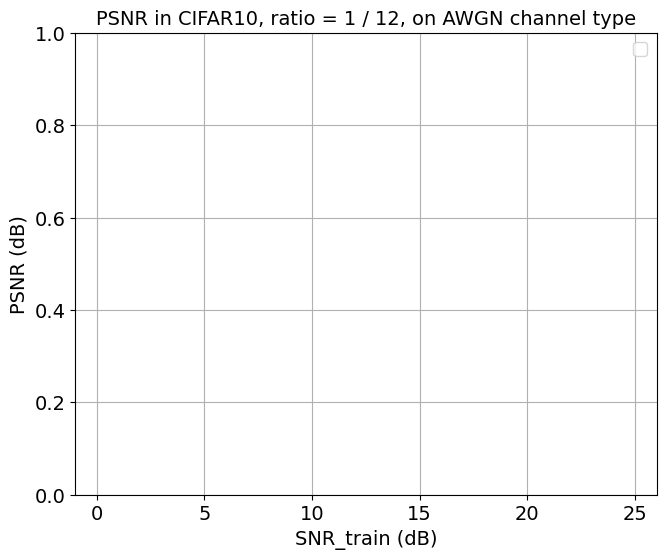

In [298]:
dataset_name = 'cifar10'
ratio ='1 / 12'
channel = 'AWGN'
plot_snr(dataset_name, ratio, ea, channel)

13
13
13
13
13


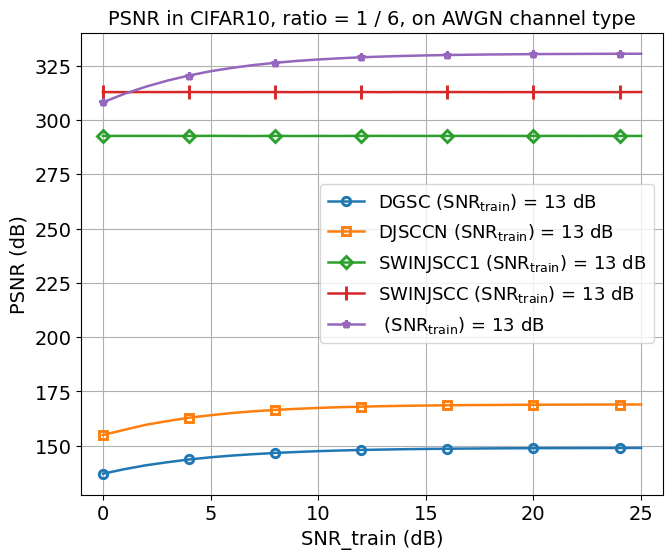

In [299]:
dataset_name = 'cifar10'
ratio ='1 / 6'
channel = 'AWGN'
plot_snr(dataset_name, ratio, ea, channel)

13
13
13


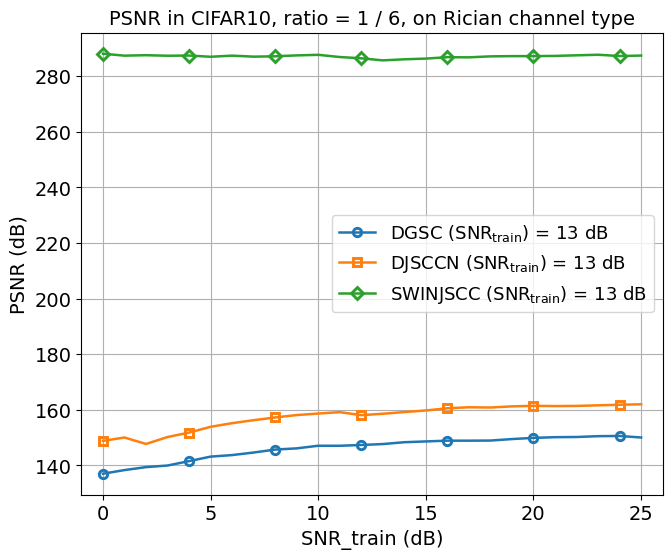

In [300]:
dataset_name = 'cifar10'
ratio ='1 / 6'
channel = 'Rician'
plot_snr(dataset_name, ratio, ea, channel, alpha = 0.3)

13
13
13


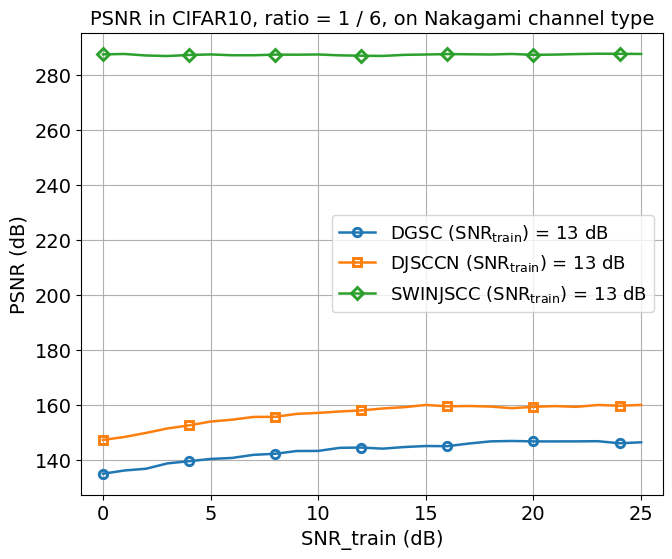

In [301]:
dataset_name = 'cifar10'
ratio ='1 / 6'
channel = 'Nakagami'
plot_snr(dataset_name, ratio, ea, channel, alpha = 0.3)

13
13


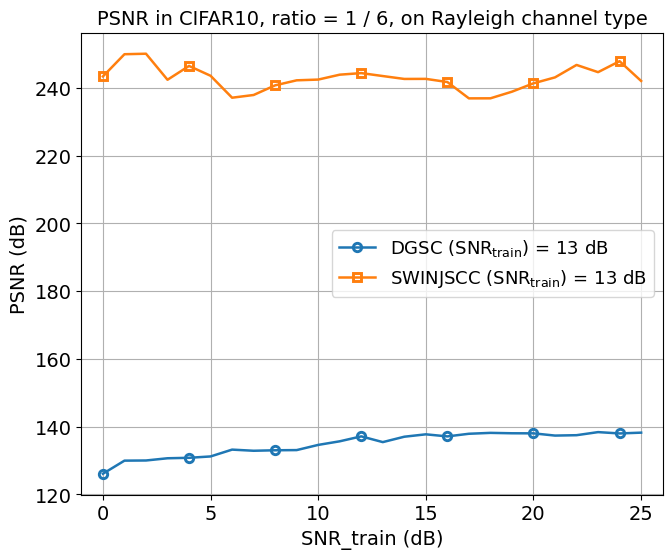

In [302]:
dataset_name = 'cifar10'
ratio ='1 / 6'
channel = 'Rayleigh'
plot_snr(dataset_name, ratio, ea, channel, alpha = 0.3)